In [26]:
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [27]:
data =pd.read_csv("lab4.csv")
print("datasets")
display(data)

datasets


,Outlook,Temp,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [28]:
x =data.iloc[:,:-1]
y =data.iloc[:, -1]

print("feature")
display(x)
print("Target")
display(y)

feature


,Outlook,Temp,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak
5,Rain,Cool,Normal,Strong
6,Overcast,Cool,Normal,Strong
7,Sunny,Mild,High,Weak
8,Sunny,Cool,Normal,Weak
9,Rain,Mild,Normal,Weak


Target


0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play, dtype: object

In [33]:
def entropy(target_col):
    values,counts=np.unique(target_col,return_counts=True)
    entropy_value=0

    for i in range(len(values)):
        probability = counts[i]/ np.sum(counts)
        entropy_value += -probability*math.log2(probability)
    return entropy_value

In [35]:
total_entropy=entropy(y)
print(f"Total Entropy = {total_entropy:.4f}")

Total Entropy = 0.9403


In [44]:
def information_gain(data, split_attribute, target_name):
    total_entropy = entropy(data[target_name])

    values, counts = np.unique(data[split_attribute], return_counts=True)

    weighted_entropy = 0
    for i in range(len(values)):
        subset = data[data[split_attribute] == values[i]]
        subset_entropy = entropy(subset[target_name])
        weighted_entropy += (counts[i] / np.sum(counts)) * subset_entropy

    IG = total_entropy - weighted_entropy
    
    return IG

In [45]:
for feature in x.columns:
    ig=information_gain(data,feature,y.name)
    print(f"IG({feature})={ig:.4f}")

IG(Outlook)=0.2467
IG(Temp)=0.0292
IG(Humidity)=0.1518
IG(Wind)=0.0481


In [48]:
IG_values = {feature: information_gain(data, feature, y.name) for feature in x.columns}
root_node = max(IG_values, key=IG_values.get)
print("Root Node (Highest Information Gain):")
print(root_node)

print(f"\n Child nodes for root attribute '{root_node}':")
for value in data[root_node].unique():
    subset = data[data[root_node] == value]
    print(f"\n[{root_node} = {value}] ->")
    display(subset)

Root Node (Highest Information Gain):
Outlook

 Child nodes for root attribute 'Outlook':

[Outlook = Sunny] ->


,Outlook,Temp,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes



[Outlook = Overcast] ->


,Outlook,Temp,Humidity,Wind,Play
2,Overcast,Hot,High,Weak,Yes
6,Overcast,Cool,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes



[Outlook = Rain] ->


,Outlook,Temp,Humidity,Wind,Play
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
9,Rain,Mild,Normal,Weak,Yes
13,Rain,Mild,High,Strong,No


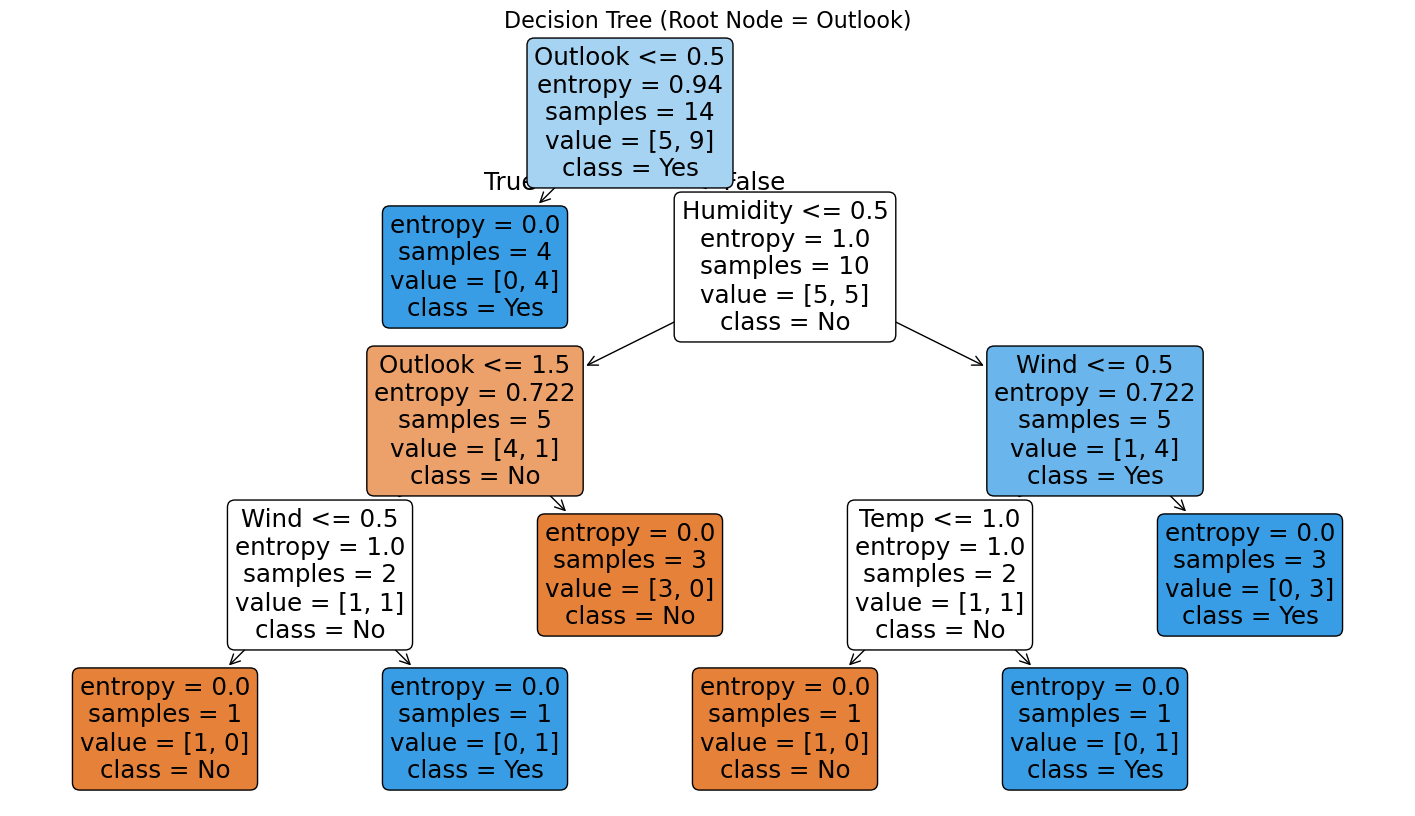

In [49]:
le_dict = {}
x_encoded = x.copy()

for col in x.columns:
    le = LabelEncoder()
    x_encoded[col] = le.fit_transform(x[col])
    le_dict[col] = le

target_le = LabelEncoder()
y_encoded = target_le.fit_transform(y)
dt = DecisionTreeClassifier(criterion="entropy")  
dt.fit(x_encoded, y_encoded)

plt.figure(figsize=(18, 10))
plot_tree(
    dt,
    feature_names=x.columns,
    class_names=target_le.classes_,
    filled=True,
    rounded=True
)
plt.title(f"Decision Tree (Root Node = {root_node})", fontsize=16)
plt.show()